In [ ]:
from google.colab import drive
import zipfile
import os

drive.mount('/content/drive')
with zipfile.ZipFile('/content/drive/MyDrive/Dataset_Bersih.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Path ke direktori dataset
dataset_dir = '/content/Dataset Bersih'

# Memuat dataset dengan shuffle diatur ke True
full_dataset = image_dataset_from_directory(dataset_dir,
                                            labels='inferred',
                                            label_mode='int',
                                            image_size=(224, 224),
                                            batch_size=32,
                                            shuffle=True)

Found 1725 files belonging to 3 classes.


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2, VGG16, DenseNet201
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input as preprocess_mobilenet
from tensorflow.keras.applications.vgg16 import preprocess_input as preprocess_vgg
from tensorflow.keras.applications.densenet import preprocess_input as preprocess_densenet
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.models import Model


# MobileNetV2
mobilenet_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
mobilenet_model.trainable = True

mobilenet_feature_model = tf.keras.Sequential([
    mobilenet_model,
    tf.keras.layers.GlobalAveragePooling2D()
])

# VGG16
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
vgg_model.trainable = True

vgg_feature_model = tf.keras.Sequential([
    vgg_model,
    tf.keras.layers.GlobalAveragePooling2D()
])

# DenseNet121
densenet_model = DenseNet201(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
densenet_model.trainable = True

densenet_feature_model = tf.keras.Sequential([
    densenet_model,
    tf.keras.layers.GlobalAveragePooling2D()
])


74836368/74836368 [==============================] - 0s 0us/step


In [ ]:
# Inisialisasi list untuk menyimpan fitur dan label
mobilenet_features_list = []
vgg_features_list = []
densenet_features_list = []
labels_list = []

# Ekstrak fitur dari dataset menggunakan MobileNetV2, VGG16 dan Densenet
for images, labels in full_dataset:
    # Ekstraksi fitur menggunakan MobileNetV2
    mobilenet_features = mobilenet_feature_model(images)
    mobilenet_features_list.append(mobilenet_features.numpy())

    # Ekstraksi fitur menggunakan VGG16
    vgg_features = vgg_feature_model(images)
    vgg_features_list.append(vgg_features.numpy())

    # Ekstraksi fitur menggunakan Densenet
    densenet_features = densenet_feature_model(images)
    densenet_features_list.append(densenet_features.numpy())

    labels_list.append(labels.numpy())

# Menggabungkan fitur dan label menjadi numpy arrays
mobilenet_features_array = np.concatenate(mobilenet_features_list)
vgg_features_array = np.concatenate(vgg_features_list)
densenet_features_array = np.concatenate(densenet_features_list)
labels_array = np.concatenate(labels_list)

# Membuat DataFrame dari fitur dan label untuk MobileNetV2
mobilenet_feature_columns = [f"mobilenet_feature_{i+1}" for i in range(mobilenet_features_array.shape[1])]
mobilenet_df = pd.DataFrame(mobilenet_features_array, columns=mobilenet_feature_columns)
mobilenet_df['label'] = labels_array

# Membuat DataFrame dari fitur dan label untuk VGG16
vgg_feature_columns = [f"vgg_feature_{i+1}" for i in range(vgg_features_array.shape[1])]
vgg_df = pd.DataFrame(vgg_features_array, columns=vgg_feature_columns)
vgg_df['label'] = labels_array

# Membuat DataFrame dari fitur dan label untuk Densenet
densenet_feature_columns = [f"densenet_feature_{i+1}" for i in range(densenet_features_array.shape[1])]
densenet_df = pd.DataFrame(densenet_features_array, columns=densenet_feature_columns)
densenet_df['label'] = labels_array



In [ ]:
# Tampilkan DataFrame untuk MobileNetV2
print("DataFrame untuk MobileNetV2:")
print(mobilenet_df.head(5))

DataFrame untuk MobileNetV2:
   mobilenet_feature_1  mobilenet_feature_2  mobilenet_feature_3  \
0             0.000000             0.350490             0.000000   
1             0.000000             0.134455             0.000000   
2             0.000000             0.625615             0.000000   
3             0.000000             0.000000             0.000000   
4             0.232998             0.690357             0.008203   

   mobilenet_feature_4  mobilenet_feature_5  mobilenet_feature_6  \
0             0.000630                  0.0             0.039118   
1             0.031821                  0.0             0.018830   
2             0.000641                  0.0             0.044464   
3             0.000000                  0.0             0.000000   
4             0.000000                  0.0             0.157563   

   mobilenet_feature_7  mobilenet_feature_8  mobilenet_feature_9  \
0             0.264480                  0.0             0.060818   
1             1.7

In [ ]:
# Tampilkan DataFrame untuk MobileNetV2
print("DataFrame untuk VGG16:")
print(vgg_df.head(5))

DataFrame untuk VGG16:
   vgg_feature_1  vgg_feature_2  vgg_feature_3  vgg_feature_4  vgg_feature_5  \
0       0.000000       0.000000       0.000000       2.315905       0.029292   
1       0.000000       0.000000       0.000000       0.000000       0.000000   
2       0.259175       0.040857       0.246776       2.051791       3.268292   
3       0.000000       0.000000       0.000000       0.000000       0.336652   
4       0.000000       0.950779       2.346238       3.805458       2.768574   

   vgg_feature_6  vgg_feature_7  vgg_feature_8  vgg_feature_9  vgg_feature_10  \
0       0.034497       0.000000       0.954500            0.0        0.000000   
1       0.000000       1.315220       0.054372            0.0        0.000000   
2       0.000000       0.000000       2.918249            0.0        0.033795   
3       0.000000       1.231063       0.000000            0.0        0.000000   
4       0.234292       0.114589       3.978576            0.0        0.026842   

   ...  v

In [ ]:
# Tampilkan DataFrame untuk MobileNetV2
print("DataFrame untuk Densenet:")
print(densenet_df.head(5))

DataFrame untuk Densenet:
   densenet_feature_1  densenet_feature_2  densenet_feature_3  \
0            0.000010                 0.0            0.004476   
1            0.000000                 0.0            0.007572   
2            0.000000                 0.0            0.004870   
3            0.000001                 0.0            0.004863   
4            0.000030                 0.0            0.005182   

   densenet_feature_4  densenet_feature_5  densenet_feature_6  \
0                 0.0            0.000618            0.000000   
1                 0.0            0.001642            0.000008   
2                 0.0            0.001507            0.000036   
3                 0.0            0.000363            0.000000   
4                 0.0            0.001772            0.000052   

   densenet_feature_7  densenet_feature_8  densenet_feature_9  \
0            0.000829            0.000681            0.000000   
1            0.001645            0.001648            0.000042 

In [ ]:
# Menggabungkan fitur dari ketiga model
combined_features_array = np.concatenate([mobilenet_features_array, vgg_features_array, densenet_features_array], axis=1)

# Membuat DataFrame dari fitur gabungan dan label
combined_feature_columns = [f"feature_{i+1}" for i in range(combined_features_array.shape[1])]
combined_df = pd.DataFrame(combined_features_array, columns=combined_feature_columns)
combined_df['label'] = labels_array

def map_label(label):
    class_names = ['mel', 'bcc', 'norm']
    return class_names[label]

# Applying map_label function to convert labels to class names
combined_df['label'] = combined_df['label'].apply(map_label)

# Displaying DataFrame with better format
pd.set_option('display.max_columns', 10)  # Show all columns
pd.set_option('display.max_rows', 10)  # Limit the number of rows displayed
pd.set_option('display.float_format', lambda x: '%.4f' % x)  # Format float numbers

# Tampilkan DataFrame gabungan
print("DataFrame gabungan untuk MobileNetV2 dan vgg50V2:")

# Showing the first few rows of the DataFrame
print(combined_df.head())


DataFrame gabungan untuk MobileNetV2 dan vgg50V2:
   feature_1  feature_2  feature_3  feature_4  feature_5  ...  feature_3709  \
0     0.0000     0.3505     0.0000     0.0006     0.0000  ...        0.0537   
1     0.0000     0.1345     0.0000     0.0318     0.0000  ...        0.4910   
2     0.0000     0.6256     0.0000     0.0006     0.0000  ...        0.2905   
3     0.0000     0.0000     0.0000     0.0000     0.0000  ...        0.1303   
4     0.2330     0.6904     0.0082     0.0000     0.0000  ...        0.0332   

   feature_3710  feature_3711  feature_3712  label  
0        0.0440        0.3407        0.0021   norm  
1        0.0718        0.9584        0.0000    bcc  
2        0.0392        0.5346        0.0515    mel  
3        0.0023        0.4699        0.8531    mel  
4        0.0000        0.1228        0.3651    mel  

[5 rows x 3713 columns]


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
import joblib  # untuk menyimpan model
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import StratifiedKFold

k = 5  # Number of folds
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
accuracies = []
precisions = []
sensitivities = []
specificities = []
f1_scores = []
best_accuracy = 0
best_model = None
best_confusion_matrix = None
best_classification_report = None

for fold, (train_index, test_index) in enumerate(skf.split(combined_features_array, labels_array)):
    train_features, test_features = combined_features_array[train_index], combined_features_array[test_index]
    train_labels, test_labels = labels_array[train_index], labels_array[test_index]

    svm = SVC()
    svm.fit(train_features, train_labels)

    predictions = svm.predict(test_features)
    accuracy = accuracy_score(test_labels, predictions)
    accuracies.append(accuracy)

    precision = precision_score(test_labels, predictions, average='weighted')
    precisions.append(precision)

    recall = recall_score(test_labels, predictions, average='weighted')
    sensitivities.append(recall)

    cm = confusion_matrix(test_labels, predictions)
    specificity = np.diag(cm) / np.sum(cm, axis=1)
    specificity = np.mean(specificity)
    specificities.append(specificity)

    f1 = f1_score(test_labels, predictions, average='weighted')
    f1_scores.append(f1)

    print(f'Fold {fold + 1}, Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Sensitivity: {recall:.4f}, Specificity: {specificity:.4f}, F1-score: {f1:.4f}')

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = svm
        best_confusion_matrix = cm
        best_classification_report = classification_report(test_labels, predictions)
        joblib.dump(best_model, 'best_svm_model.pkl')

average_accuracy = np.mean(accuracies)
average_precision = np.mean(precisions)
average_sensitivity = np.mean(sensitivities)
average_specificity = np.mean(specificities)
average_f1 = np.mean(f1_scores)

print(f'Average accuracy: {average_accuracy:.4f}, Best accuracy: {best_accuracy:.4f}')
print("Best Confusion Matrix:")
print(best_confusion_matrix)
print("Best Classification Report:")
print(best_classification_report)

print(f'Average Precision: {average_precision:.4f}')
print(f'Average Sensitivity: {average_sensitivity:.4f}')
print(f'Average Specificity: {average_specificity:.4f}')
print(f'Average F1-score: {average_f1:.4f}')

Fold 1, Accuracy: 0.8783, Precision: 0.8824, Sensitivity: 0.8783, Specificity: 0.8783, F1-score: 0.8785
Fold 2, Accuracy: 0.8551, Precision: 0.8651, Sensitivity: 0.8551, Specificity: 0.8551, F1-score: 0.8566
Fold 3, Accuracy: 0.8638, Precision: 0.8659, Sensitivity: 0.8638, Specificity: 0.8638, F1-score: 0.8644
Fold 4, Accuracy: 0.8696, Precision: 0.8722, Sensitivity: 0.8696, Specificity: 0.8696, F1-score: 0.8701
Fold 5, Accuracy: 0.8203, Precision: 0.8276, Sensitivity: 0.8203, Specificity: 0.8203, F1-score: 0.8219
Average accuracy: 0.8574, Best accuracy: 0.8783
Best Confusion Matrix:
[[105   7   3]
 [  8 103   4]
 [ 15   5  95]]
Best Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.91      0.86       115
           1       0.90      0.90      0.90       115
           2       0.93      0.83      0.88       115

    accuracy                           0.88       345
   macro avg       0.88      0.88      0.88       345
weighted 

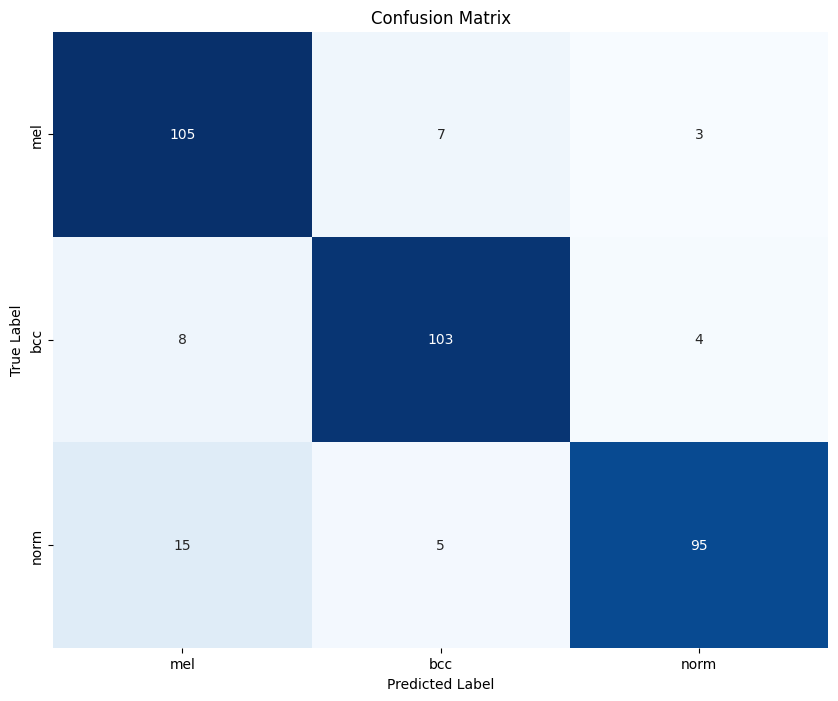

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting Confusion Matrix
# plt.figure(figsize=(10, 8))
# sns.heatmap(best_confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
# plt.title('Confusion Matrix')
# plt.xlabel('Predicted Label')
# plt.ylabel('True Label')
# plt.show()

# Menampilkan Confusion Matrix dengan label yang tepat
plt.figure(figsize=(10, 8))
sns.heatmap(best_confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

# Mendapatkan nama kelas dari variabel class_names
class_names = ['mel', 'bcc', 'norm']

# Menambahkan label ke sumbu x dan y
plt.xticks(ticks=np.arange(len(class_names))+0.5, labels=class_names, ha='center')
plt.yticks(ticks=np.arange(len(class_names))+0.5, labels=class_names, va='center')

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

# Memuat model SVM terbaik yang sudah disimpan sebelumnya
best_svm = joblib.load('best_svm_model.pkl')

# Parameter yang akan diuji
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

# Membuat objek GridSearchCV
grid_search = GridSearchCV(estimator=best_svm, param_grid=param_grid, cv=5, scoring='accuracy')

# Melakukan grid search
grid_search.fit(train_features, train_labels)

# Menampilkan parameter terbaik
print("Parameter terbaik:", grid_search.best_params_)

Parameter terbaik: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import joblib

# Best parameters obtained from GridSearchCV
best_params = {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}

k = 5  # Number of folds
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
accuracies = []
precisions = []
sensitivities = []
specificities = []
f1_scores = []
best_accuracy = 0
best_model = None
best_confusion_matrix = None
best_classification_report = None

for fold, (train_index, test_index) in enumerate(skf.split(combined_features_array, labels_array)):
    train_features, test_features = combined_features_array[train_index], combined_features_array[test_index]
    train_labels, test_labels = labels_array[train_index], labels_array[test_index]

    svm = SVC(**best_params)
    svm.fit(train_features, train_labels)

    predictions = svm.predict(test_features)
    accuracy = accuracy_score(test_labels, predictions)
    accuracies.append(accuracy)

    precision = precision_score(test_labels, predictions, average='weighted')
    precisions.append(precision)

    recall = recall_score(test_labels, predictions, average='weighted')
    sensitivities.append(recall)

    cm = confusion_matrix(test_labels, predictions)
    specificity = np.diag(cm) / np.sum(cm, axis=1)
    specificity = np.mean(specificity)
    specificities.append(specificity)

    f1 = f1_score(test_labels, predictions, average='weighted')
    f1_scores.append(f1)

    print(f'Fold {fold + 1}, Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Sensitivity: {recall:.4f}, Specificity: {specificity:.4f}, F1-score: {f1:.4f}')

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = svm
        best_confusion_matrix = cm
        best_classification_report = classification_report(test_labels, predictions)
        joblib.dump(best_model, 'best_svm_model_tuning.pkl')

average_accuracy = np.mean(accuracies)
average_precision = np.mean(precisions)
average_sensitivity = np.mean(sensitivities)
average_specificity = np.mean(specificities)
average_f1 = np.mean(f1_scores)

print(f'Average accuracy: {average_accuracy:.4f}, Best accuracy: {best_accuracy:.4f}')
print("Best Confusion Matrix:")
print(best_confusion_matrix)
print("Best Classification Report:")
print(best_classification_report)

print(f'Average Precision: {average_precision:.4f}')
print(f'Average Sensitivity: {average_sensitivity:.4f}')
print(f'Average Specificity: {average_specificity:.4f}')
print(f'Average F1-score: {average_f1:.4f}')

Fold 1, Accuracy: 0.9101, Precision: 0.9116, Sensitivity: 0.9101, Specificity: 0.9101, F1-score: 0.9103
Fold 2, Accuracy: 0.8957, Precision: 0.8977, Sensitivity: 0.8957, Specificity: 0.8957, F1-score: 0.8962
Fold 3, Accuracy: 0.9246, Precision: 0.9248, Sensitivity: 0.9246, Specificity: 0.9246, F1-score: 0.9247
Fold 4, Accuracy: 0.9188, Precision: 0.9205, Sensitivity: 0.9188, Specificity: 0.9188, F1-score: 0.9189
Fold 5, Accuracy: 0.8899, Precision: 0.8912, Sensitivity: 0.8899, Specificity: 0.8899, F1-score: 0.8895
Average accuracy: 0.9078, Best accuracy: 0.9246
Best Confusion Matrix:
[[108   6   1]
 [  6 104   5]
 [  3   5 107]]
Best Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       115
           1       0.90      0.90      0.90       115
           2       0.95      0.93      0.94       115

    accuracy                           0.92       345
   macro avg       0.92      0.92      0.92       345
weighted 

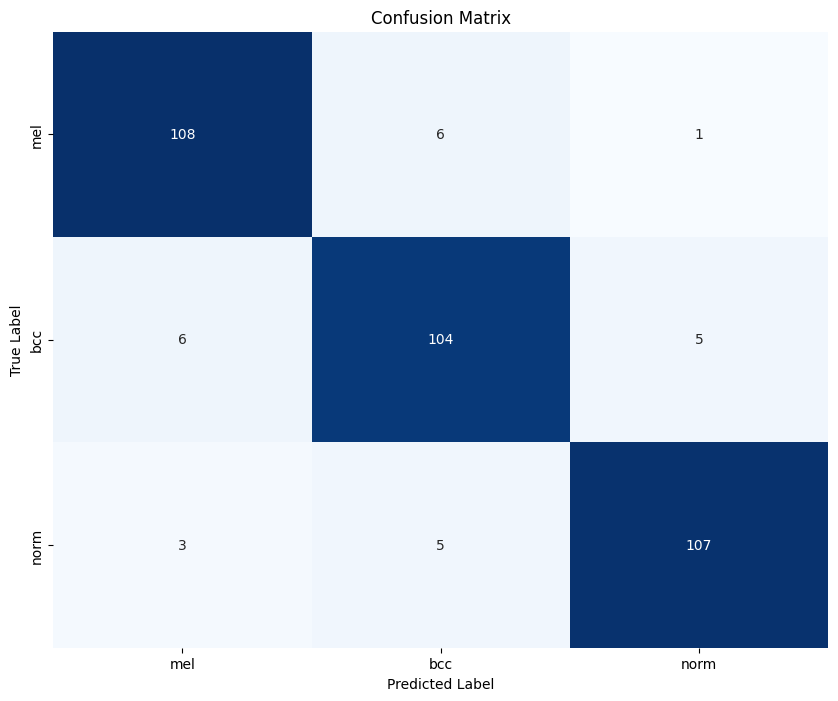

In [ ]:
# Menampilkan Confusion Matrix dengan label yang tepat
plt.figure(figsize=(10, 8))
sns.heatmap(best_confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

# Mendapatkan nama kelas dari variabel class_names
class_names = ['mel', 'bcc', 'norm']

# Menambahkan label ke sumbu x dan y
plt.xticks(ticks=np.arange(len(class_names))+0.5, labels=class_names, ha='center')
plt.yticks(ticks=np.arange(len(class_names))+0.5, labels=class_names, va='center')

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()